# Safety Incidents: Preprocessing & Visualization Pipeline

This notebook implements a complete preprocessing pipeline for the Safety Incidents dataset. 
A key focus is **Visualizing** the data and the impact of each preprocessing step.

## Pipeline Steps:
1. **Data Loading & Exploration**: Understanding the data structure and distributions.
2. **Missing Data Handling**: Analyzing and imputing missing values (with visualizations).
3. **Categorical Encoding**: Transforming categorical variables for modeling.
4. **Feature Engineering**: Creating new meaningful features.
5. **Normalization/Standardization**: Scaling numerical features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported and style set.")

Libraries imported and style set.


## 1. Data Loading & Initial Exploration

In [2]:
# Load the dataset
df = pd.read_csv('dataset/safety_incidents.csv')

# Display basic info
print(f"Dataset Shape: {df.shape}")
display(df.head())
display(df.info())

Dataset Shape: (5000, 21)


,incident_id,mine_type,mine_location,country,worker_age,years_experience,employment_type,job_title,gender,incident_date,...,incident_time,shift_type,hours_into_shift,equipment_involved,task_at_incident,injury_mechanism,injury_type,body_part_injured,injury_severity,ppe_worn
0,INC-04489389,artisanal,surface,tanzania,33,6.0,operator,laborer,male,2024-09-26,...,11.00,morning,0.3,mobile_equipment,directing_equipment,falling,other,hand_finger,days_away,none
1,INC-B73294FB,formal_small,surface,tanzania,56,33.7,contractor,other,male,2021-07-28,...,14.29,evening,5.5,light_vehicle,operating_equipment,other,fracture,foot_lower_leg,days_away,partial
2,INC-59915C7F,artisanal,underground,south_africa,33,3.6,contractor,driller,male,2020-03-29,...,12.00,morning,2.6,earth_moving,other,other,abrasion,multiple,days_away,none
3,INC-58CFCAA0,artisanal,surface,south_africa,36,9.5,operator,supervisor,female,2023-11-30,...,14.95,evening,5.5,haul_truck,operating_equipment,struck_by_object,other,torso,days_away,none
4,INC-F2889CF6,formal_large,surface,ghana,59,25.3,operator,mechanic_repairman,female,2021-07-26,...,13.49,morning,0.5,mobile_equipment,other,other,laceration,torso,restricted_work,full


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   incident_id         5000 non-null   object 
 1   mine_type           5000 non-null   object 
 2   mine_location       5000 non-null   object 
 3   country             5000 non-null   object 
 4   worker_age          5000 non-null   int64  
 5   years_experience    5000 non-null   float64
 6   employment_type     5000 non-null   object 
 7   job_title           5000 non-null   object 
 8   gender              5000 non-null   object 
 9   incident_date       5000 non-null   object 
 10  day_of_week         5000 non-null   object 
 11  incident_time       5000 non-null   float64
 12  shift_type          5000 non-null   object 
 13  hours_into_shift    5000 non-null   float64
 14  equipment_involved  5000 non-null   object 
 15  task_at_incident    5000 non-null   object 
 16  injury

None

### Initial Visualizations
Let's visualize the distribution of some key variables.

C:\Users\EZE\AppData\Local\Temp\ipykernel_8664\1539023334.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='injury_severity', ax=axes[1], palette='viridis', order=df['injury_severity'].value_counts().index)


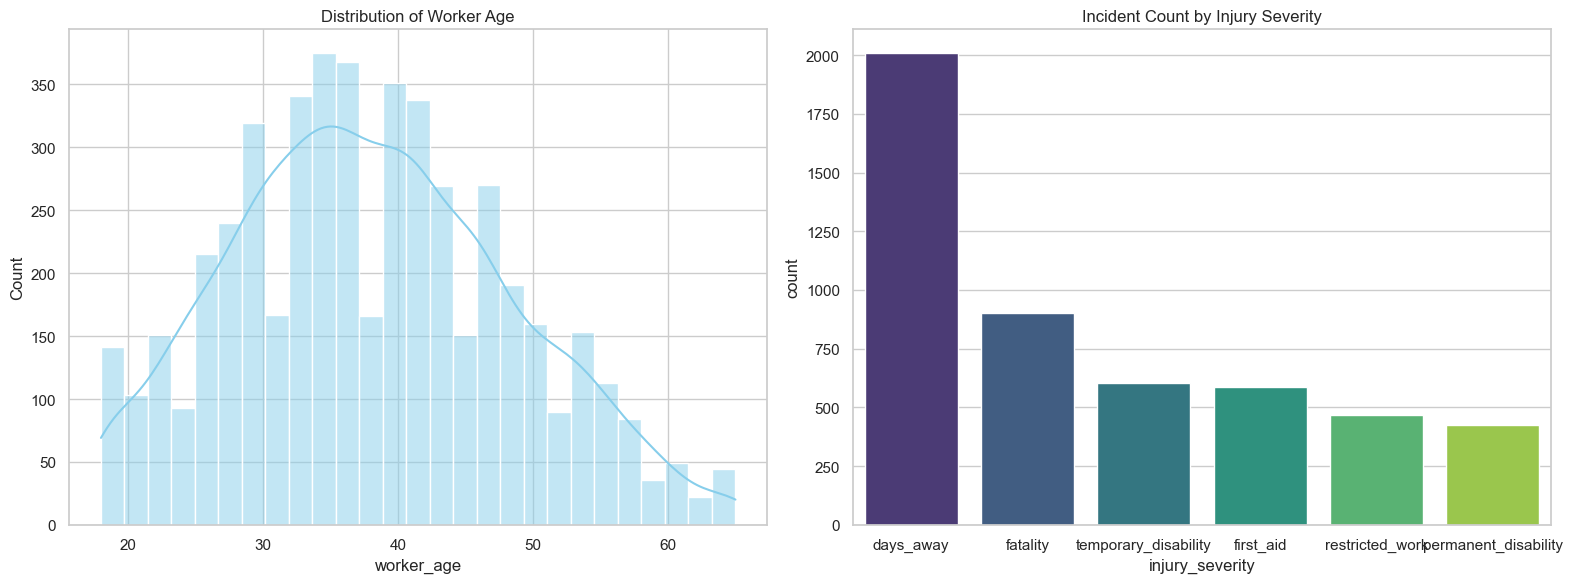

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Distribution of Worker Age
sns.histplot(df['worker_age'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Worker Age')

# Count of Incidents by Injury Severity
sns.countplot(data=df, x='injury_severity', ax=axes[1], palette='viridis', order=df['injury_severity'].value_counts().index)
axes[1].set_title('Incident Count by Injury Severity')

plt.tight_layout()
plt.show()

## 2. Missing Data Handling

Since the original dataset might be clean, we will simulate missing values to demonstrate handling techniques.

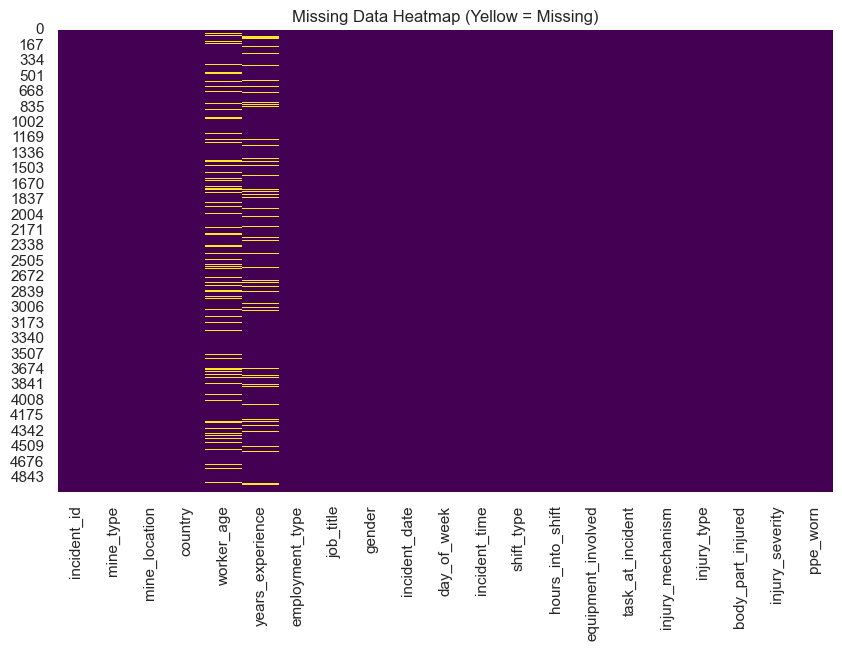

In [16]:
# Simulate missing values in 'worker_age' and 'years_experience'
np.random.seed(42)
df_missing = df.copy()

mask_age = np.random.rand(len(df)) < 0.15  # 15% missing in age
mask_exp = np.random.rand(len(df)) < 0.10  # 10% missing in experience

df_missing.loc[mask_age, 'worker_age'] = np.nan
df_missing.loc[mask_exp, 'years_experience'] = np.nan

# Visualize Missingness
plt.figure(figsize=(10, 6))
sns.heatmap(df_missing.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap (Yellow = Missing)')
plt.show()

### Imputation Strategies
We will compare **Mean Imputation** vs **Median Imputation**.

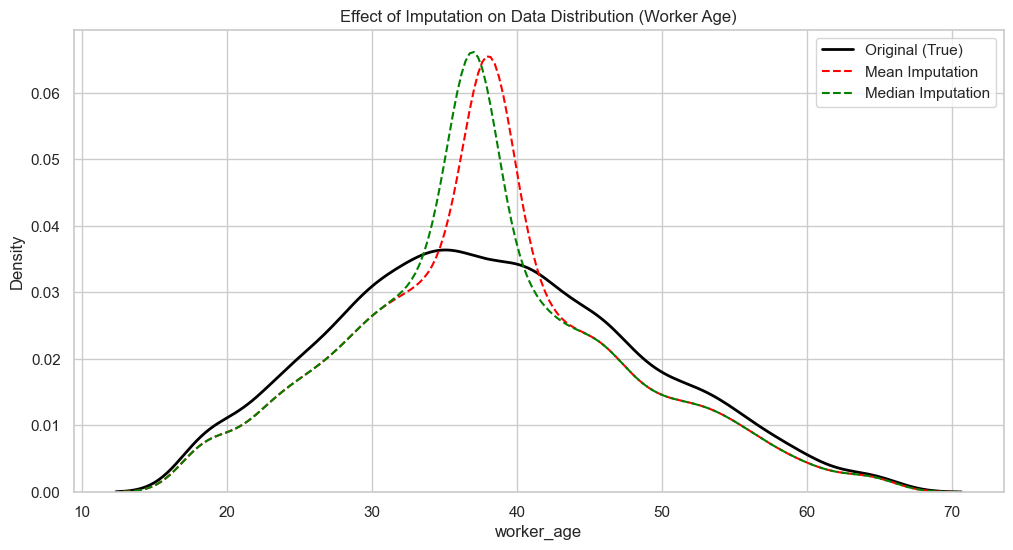

In [17]:
from sklearn.impute import SimpleImputer

# Strategy 1: Mean Imputation
imputer_mean = SimpleImputer(strategy='mean')
age_mean_imputed = imputer_mean.fit_transform(df_missing[['worker_age']])

# Strategy 2: Median Imputation
imputer_median = SimpleImputer(strategy='median')
age_median_imputed = imputer_median.fit_transform(df_missing[['worker_age']])

# Visualization: Compare Distributions
plt.figure(figsize=(12, 6))
sns.kdeplot(df['worker_age'], label='Original (True)', color='black', linewidth=2)
sns.kdeplot(age_mean_imputed.flatten(), label='Mean Imputation', color='red', linestyle='--')
sns.kdeplot(age_median_imputed.flatten(), label='Median Imputation', color='green', linestyle='--')

plt.title('Effect of Imputation on Data Distribution (Worker Age)')
plt.legend()
plt.show()

In [18]:
# Apply Median Imputation to the dataframe for next steps
df_clean = df_missing.copy()
df_clean['worker_age'] = imputer_median.fit_transform(df_clean[['worker_age']])
df_clean['years_experience'] = imputer_median.fit_transform(df_clean[['years_experience']])

## 3. Categorical Variable Encoding

We will handle categorical variables using One-Hot Encoding.

In [19]:
# Identify categorical columns
cat_cols = ['gender', 'shift_type', 'injury_severity']

print(f"Categorical Columns to Encode: {cat_cols}")

# One-Hot Encoding
df_encoded = pd.get_dummies(df_clean, columns=cat_cols, drop_first=True)

print(f"Shape after encoding: {df_encoded.shape}")
display(df_encoded.head())

Categorical Columns to Encode: ['gender', 'shift_type', 'injury_severity']
Shape after encoding: (5000, 26)


,incident_id,mine_type,mine_location,country,worker_age,years_experience,employment_type,job_title,incident_date,day_of_week,...,body_part_injured,ppe_worn,gender_male,shift_type_morning,shift_type_night,injury_severity_fatality,injury_severity_first_aid,injury_severity_permanent_disability,injury_severity_restricted_work,injury_severity_temporary_disability
0,INC-04489389,artisanal,surface,tanzania,33.0,6.0,operator,laborer,2024-09-26,tuesday,...,hand_finger,none,True,True,False,False,False,False,False,False
1,INC-B73294FB,formal_small,surface,tanzania,56.0,33.7,contractor,other,2021-07-28,friday,...,foot_lower_leg,partial,True,False,False,False,False,False,False,False
2,INC-59915C7F,artisanal,underground,south_africa,33.0,3.6,contractor,driller,2020-03-29,wednesday,...,multiple,none,True,True,False,False,False,False,False,False
3,INC-58CFCAA0,artisanal,surface,south_africa,36.0,9.5,operator,supervisor,2023-11-30,thursday,...,torso,none,False,False,False,False,False,False,False,False
4,INC-F2889CF6,formal_large,surface,ghana,59.0,25.3,operator,mechanic_repairman,2021-07-26,wednesday,...,torso,full,False,True,False,False,False,False,True,False


## 4. Feature Engineering

Creating new features to extract more insights.
1. **Incident Hour**: Extracted from `incident_time`.
2. **Experience Ratio**: `years_experience` / `worker_age`.

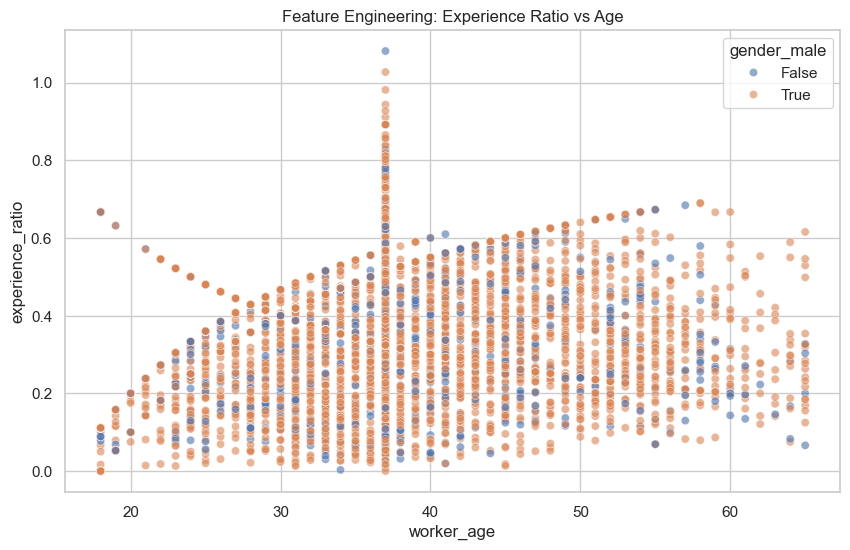

In [20]:
# 1. Incident Hour (assuming incident_time is float hours)
df_encoded['incident_hour'] = df_encoded['incident_time'].astype(int)

# 2. Experience Ratio
df_encoded['experience_ratio'] = df_encoded['years_experience'] / df_encoded['worker_age']

# Visualize New Feature
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_encoded, x='worker_age', y='experience_ratio', hue='gender_male', alpha=0.6)
plt.title('Feature Engineering: Experience Ratio vs Age')
plt.show()

## 5. Normalization / Standardization

Scaling numerical features to a common range.

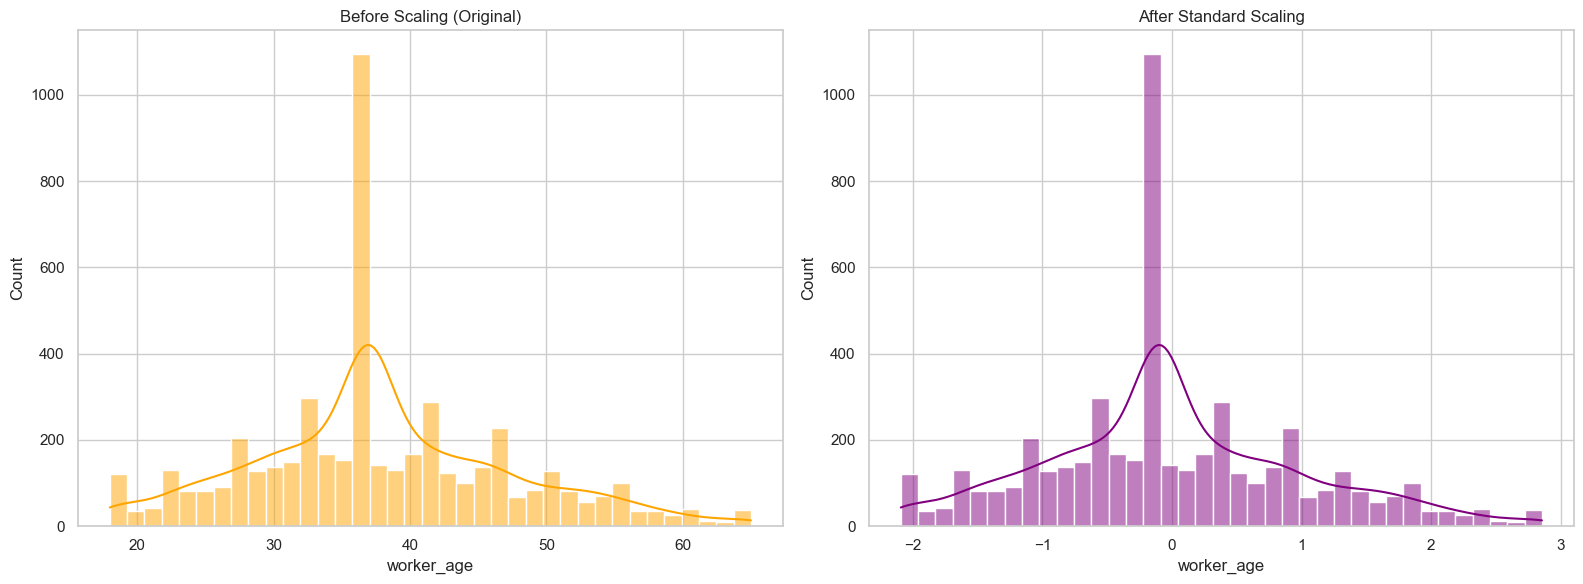

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

cols_to_scale = ['worker_age', 'years_experience', 'incident_time']

# StandardScaler
scaler = StandardScaler()
df_scaled = df_encoded.copy()
df_scaled[cols_to_scale] = scaler.fit_transform(df_encoded[cols_to_scale])

# Visualization: Before vs After Scaling
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(df_encoded['worker_age'], kde=True, ax=axes[0], color='orange')
axes[0].set_title('Before Scaling (Original)')

sns.histplot(df_scaled['worker_age'], kde=True, ax=axes[1], color='purple')
axes[1].set_title('After Standard Scaling')

plt.tight_layout()
plt.show()

## Conclusion
We have successfully built a preprocessing pipeline that handles missing data, encodes categorical variables, creates new features, and scales the data, with visualizations at every step to verify the process.